In [1]:
# ======================================================================================
# Notebook setup
# 
# Run this cell before all others to make sure that the Jupyter notebook works properly
# ======================================================================================

# Automatically reload all imported modules
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

figsize = (20, 4.5)

# Remaining Useful Life

## Remaining Useful Life

**The _Remaining Useful Life_ is a key concept in predictive maintenance**

The RUL refers to _the time until a component becomes unusable_

* If we can estimate the RUL of a component
* ...We can schedule maintenance operations only when they are needed

**As a first case study, we will _define a RUL-based maintance policy_**

In particular:

* We wil try to build a _data-driven RUL estimator_
* ...And we will trigger maintenance only if the estimated RUL becomes too low

**This is sort of the "holy grail" in predictive maintenance**

* We will see how to build a successful method
* ...But we will work on a synthetic dataset

## The Dataset

**We will consider the NASA [C-MAPSS dataset](https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/)**

* The Modular Aero-Propulsion System Simulation (MAPSS)
* ...Is a NASA-developed simulator for turbofan engines

<center><img src="assets/Turbofan3_Labelled.gif" width="500px"/></center>

* It comes with both a Military (MAPSS) and commercial versionn (C-MAPSS)
* They different in the attributes of the considered engines

## The Dataset

**The C-MAPSS system can simulate a number of faults and defects**

...And it was used to build a high-quality dataset for the PHM08 conference

* Four files contain multiple _full run-to-failure experiments_
* Other four files contain instead _truncated experiments_

**We will focus on the hardest of the "full" benchmark files**

In the dataset, this is referred to as "train_FD004"

In [2]:
from util import util
data = util.load_data(data_folder='data', fnames=['train_FD004'])

This is the first piece of code that we see:

* You can find the details in the `util/util.py` files
* Or you can disregard them and just focus on the main idea

## Inspecting the Data

**Let's have a look at the dataset**

In [3]:
print(f'#Example: {len(data)}, #experiments: {len(data["machine"].unique())}')
data.iloc[:3]

#Example: 61249, #experiments: 249


,src,machine,cycle,p1,p2,p3,s1,s2,s3,s4,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,rul
0,train_FD004,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,...,2387.99,8074.83,9.3335,0.02,330,2212,100.0,10.62,6.3670,320
1,train_FD004,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,...,2387.73,8046.13,9.1913,0.02,361,2324,100.0,24.37,14.6552,319
2,train_FD004,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,...,2387.97,8066.62,9.4007,0.02,329,2212,100.0,10.48,6.4213,318


* Columns "p1, p2, p3" refer to controlled parameters
* Columns "s1" to "s21" refer to sensor readings
* The "machine" column identifies different experiments
* The "rul" column contains the remaining useful life

## Inspecting the Data

**Let's have an global look at our dataset**

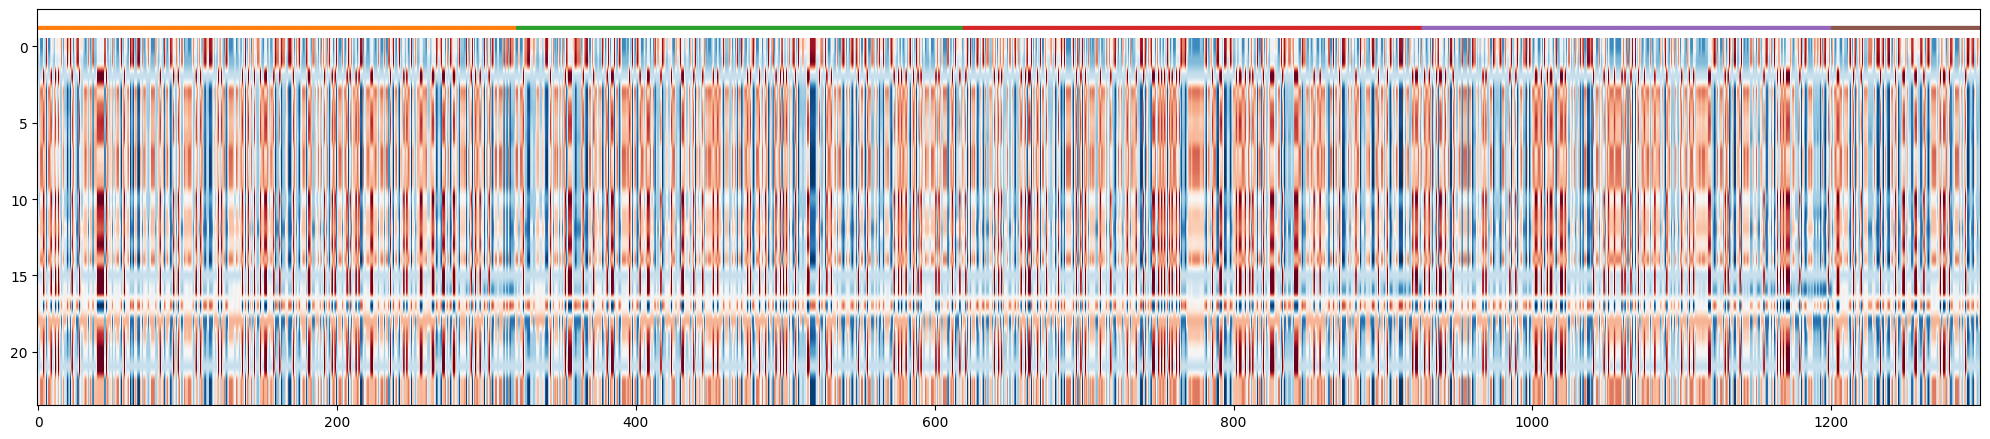

In [4]:
dt_in = list(data.columns[3:-1])
tmp = data.iloc[:1300]
util.plot_df_heatmap(tmp[dt_in], labels=tmp['machine'], figsize=figsize)

* Each color in the top row identifies a _different run-to-failure experiment_
* Other rows show (standardized) _column values_ (red = low, blue = high)

## Inspecting the Data

**Our RUL is literally the time to the experiment end**

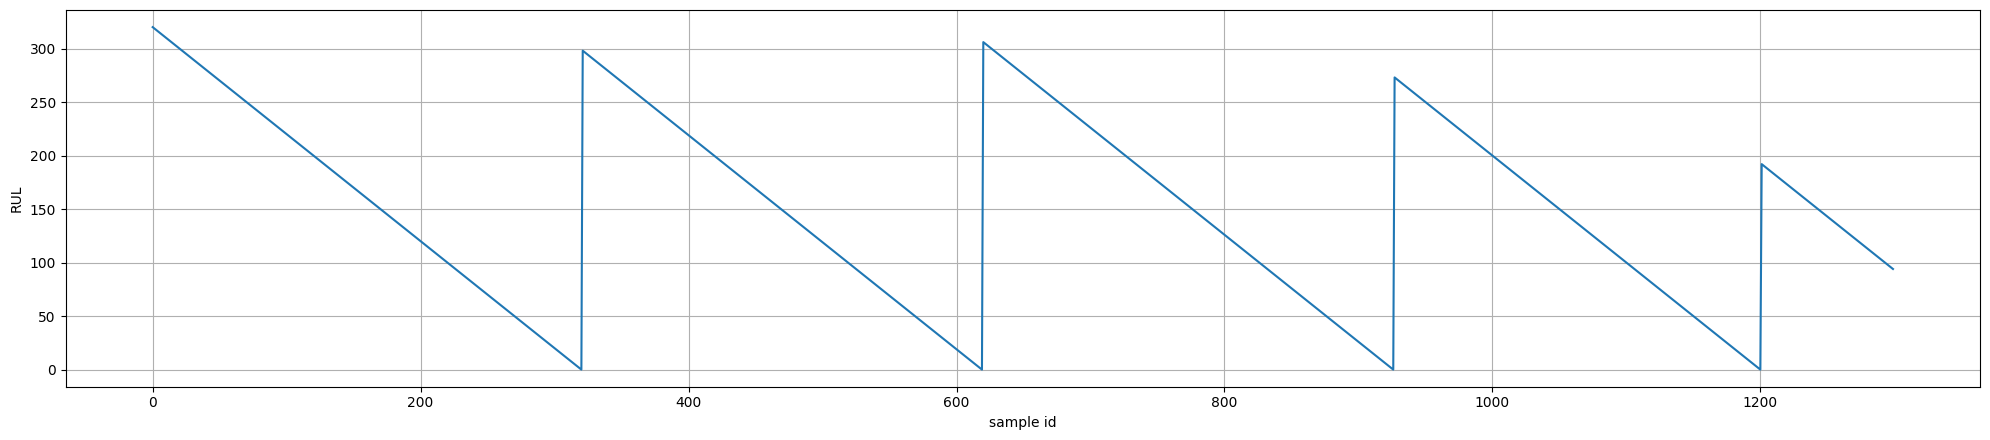

In [6]:
util.plot_series(tmp[['rul']], figsize=figsize, xlabel='sample id', ylabel='RUL')

* As a result, in our dataset we will have this "saw-like" patter
* Each "tooth" refers to a full run-to-failure experiment